In [2]:
## Load the required packages

import sys
import subprocess

#implement pip as a subprocess:
subprocess.check_call([sys.executable, '-m', 'pip', 'install','pandas'])
subprocess.check_call([sys.executable, '-m', 'pip', 'install','numpy'])
subprocess.check_call([sys.executable, '-m', 'pip', 'install','sklearn'])
subprocess.check_call([sys.executable, '-m', 'pip', 'install','statsmodels'])
subprocess.check_call([sys.executable, '-m', 'pip', 'install','seaborn'])

import numpy as np
import pandas as pd
import datetime
import random
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew, norm, probplot
from scipy import stats
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error

# python or jupyter notebook usually only play the last call, so we need the above code to make every call can be seen
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [13]:
# Import data and get information
from sklearn.datasets import load_boston
boston_dataset = load_boston()
format(boston_dataset.keys())
print("The description of Boston Housing data", boston_dataset.DESCR)


"dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])"

The description of Boston Housing data .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


In [14]:
# Load the data
dataset = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
dataset.info()
# This datazset has 506 observations and 13 attribute variables, most of them are float type.
# From the nummber of each variables, we observe that there is no missing values.
dataset['MEDV'] = boston_dataset.target   # Add response variables
dataset.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


In [4]:
## Checking for missing values
missing = dataset.isnull().sum() # collecting missing values
missing
missing = missing[missing > 0] # storing them in the array missing
missing.sort_values(inplace=True) # arraging the missing values by their numbers
print("There are", len(missing),"attributes have missing values in the training dataset.")
print("The total number of missing value in training dataset is", sum(missing),".") # calculating the appearance of missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are 0 attributes have missing values in the training dataset.
The total number of missing value in training dataset is 0 .


In [64]:
## Checking outliers
for x in dataset.columns:
    q75,q25 = np.percentile(dataset.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    dataset.loc[dataset[x] < min,x] = np.nan
    dataset.loc[dataset[x] > max,x] = np.nan

# Sum of count of NULL values/outliers in each column of the dataset
dataset.isnull().sum()
# drop the null values
datasetdrop = dataset.dropna(axis = 0)

CRIM       66
ZN         68
INDUS       0
CHAS       35
NOX         0
RM         30
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO    15
B          77
LSTAT       7
MEDV       40
dtype: int64

In [65]:
# after droping the outliers, check missing value again
datasetdrop.isnull().sum()
datasetdrop.shape
# Now there are only 268 observations.

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

(268, 14)

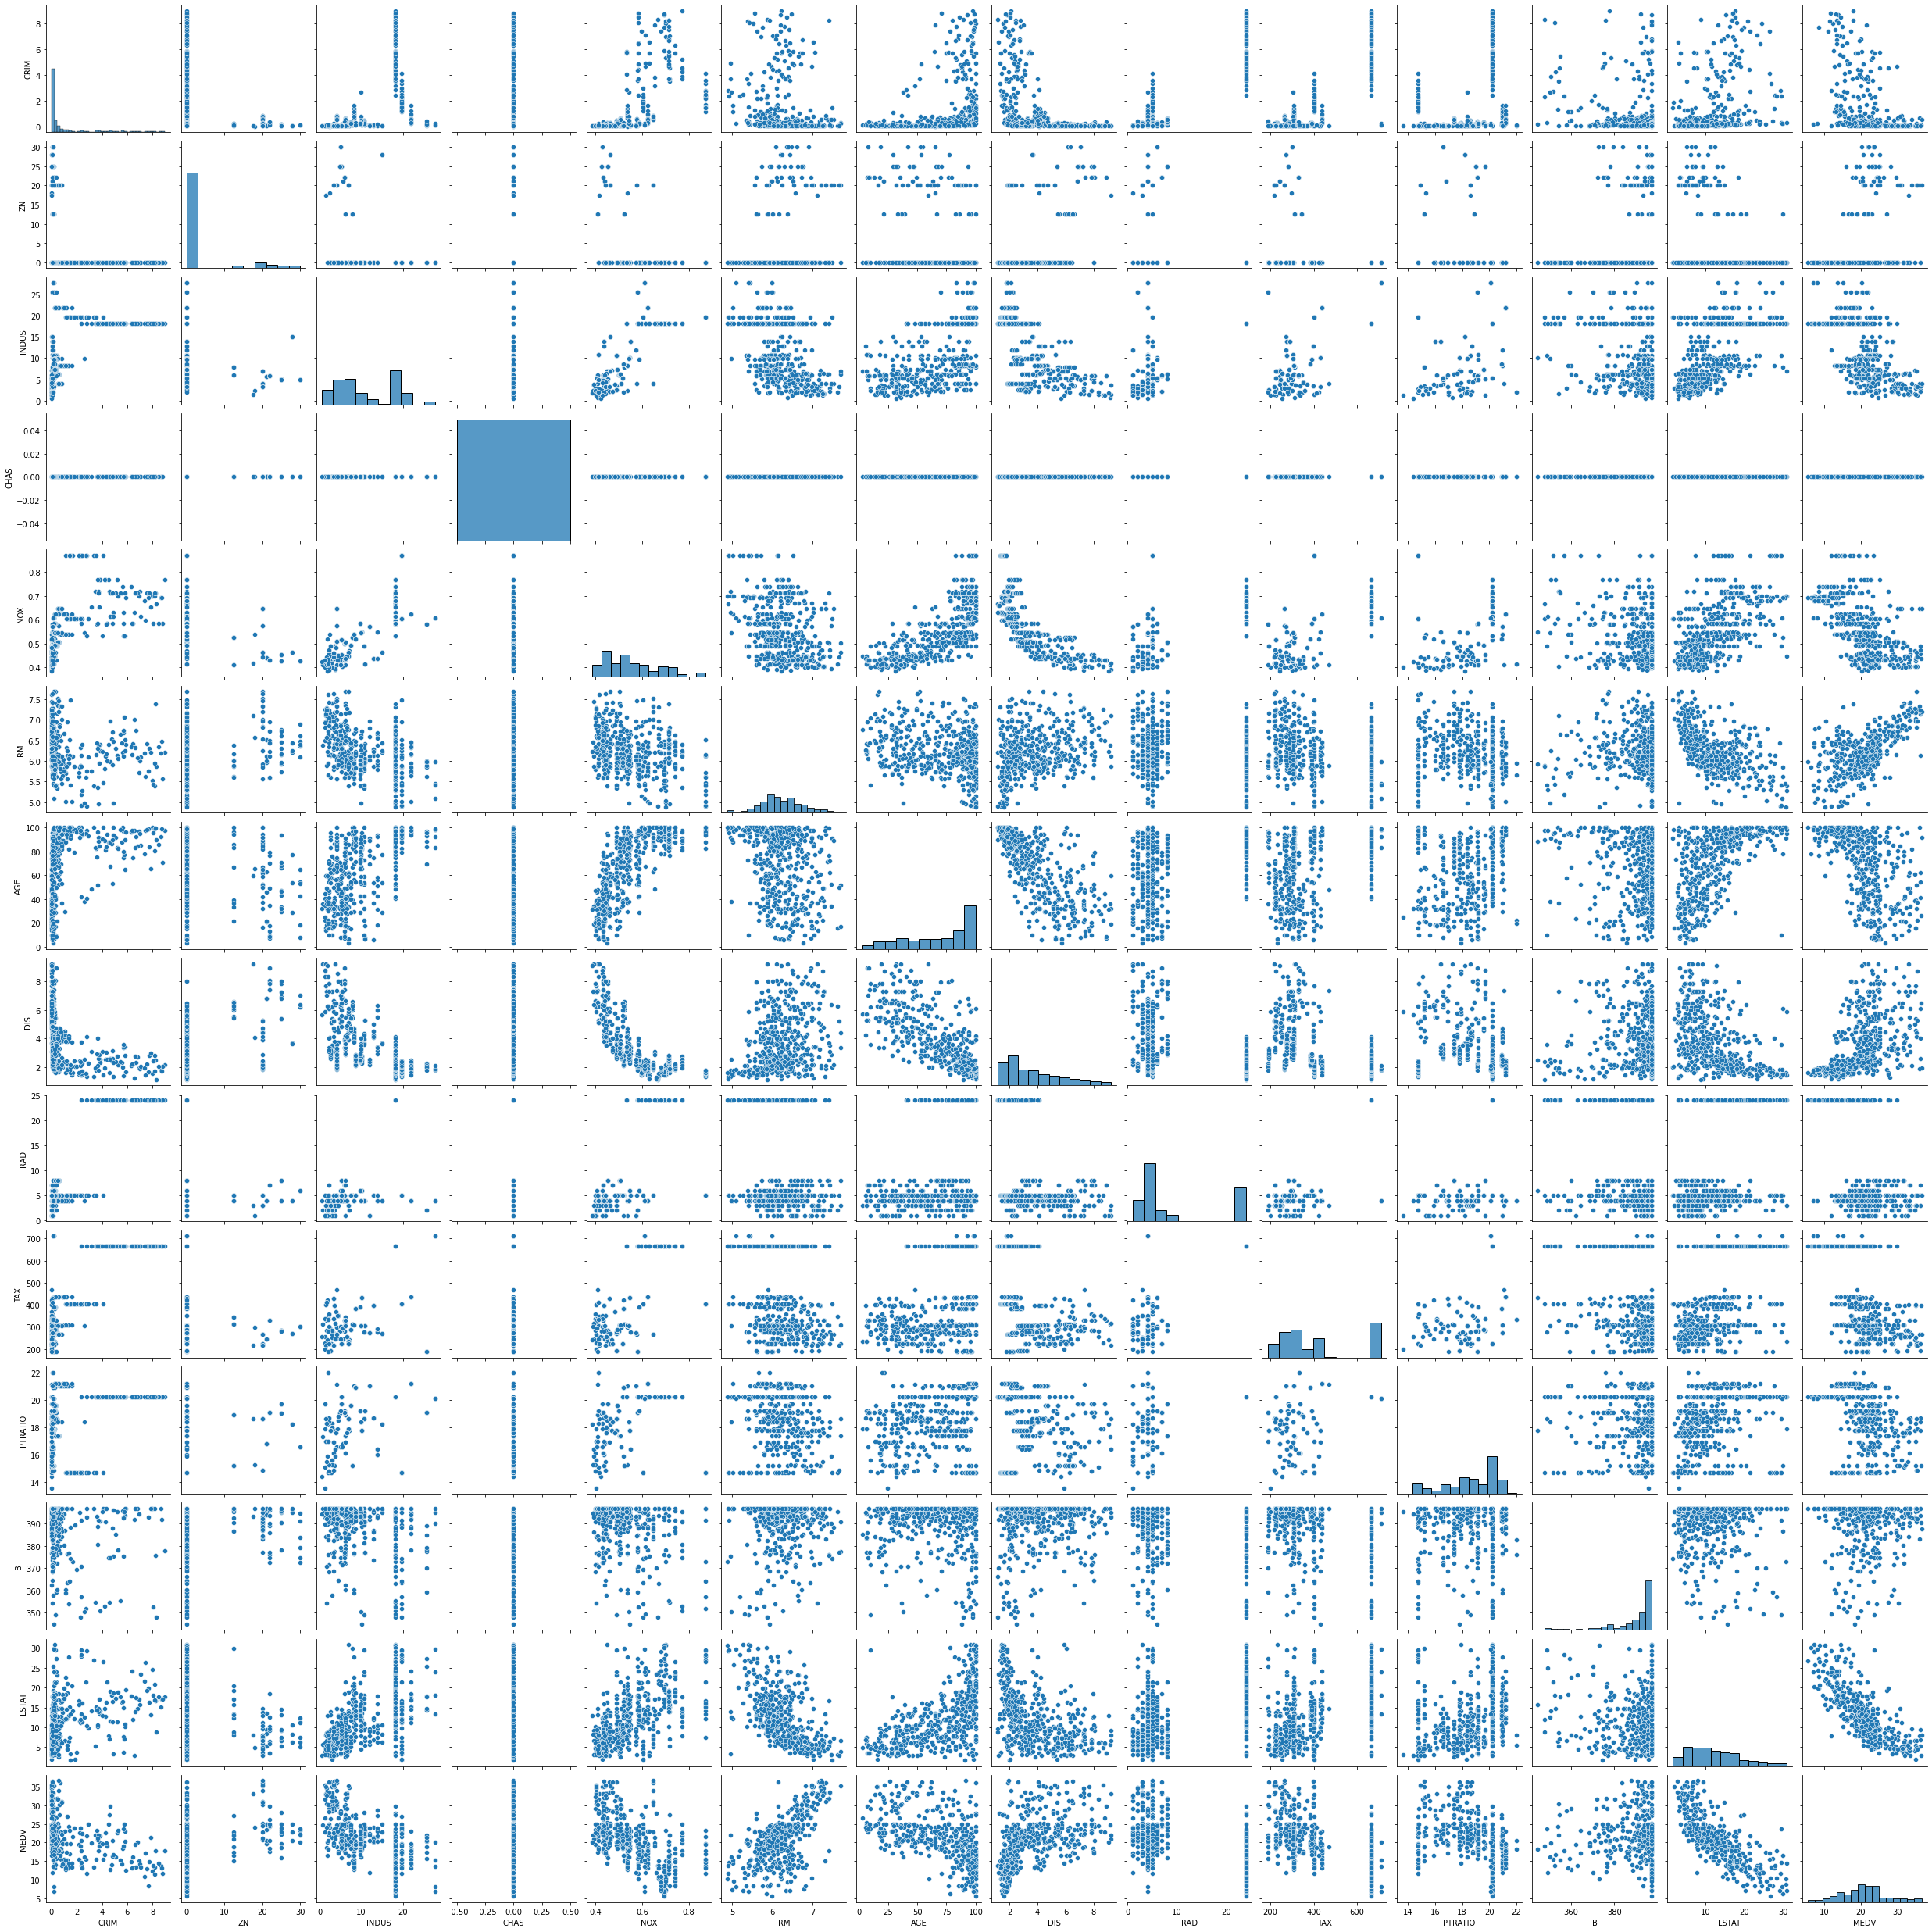

In [74]:
## Relationship between variables
# pairwise relationships in the data
sns.pairplot(data=dataset)

<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

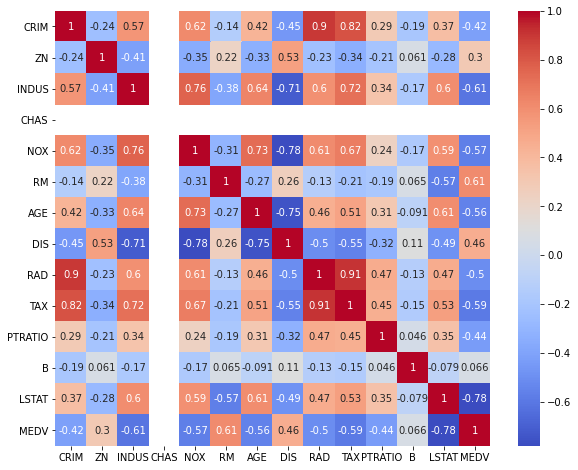

In [75]:
# Correlation between predicted variables
plt.figure(figsize=(10,8))
cor = dataset.corr()
sns.heatmap(cor, cmap='coolwarm', square=True, annot=True)

,CRIM,MEDV
CRIM,1.000000,-0.416454
MEDV,-0.416454,1.000000


<AxesSubplot:xlabel='CRIM', ylabel='MEDV'>

[Text(0, 0.5, 'CRIM'), Text(0.5, 1.0, 'The barplot of CRIM')]

<AxesSubplot:xlabel='CRIM', ylabel='Count'>

[Text(0.5, 0, 'CRIM'), Text(0.5, 1.0, 'The distribution of CRIM')]

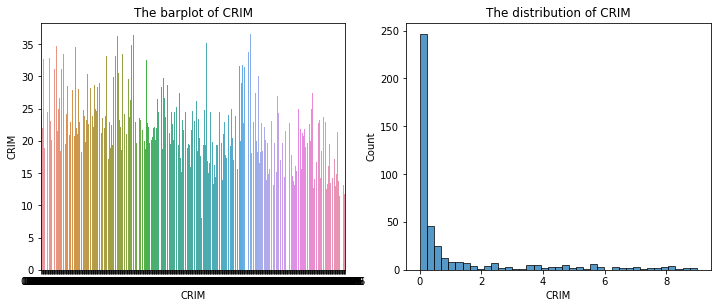

In [76]:
# Relationship between CRIM and MEDV
dataset[['CRIM','MEDV']].corr()

fig, axes = plt.subplots(1,2,figsize = (12,10))
axes1 = plt.subplot(2,2,1)
sns.barplot(x=dataset['CRIM'] ,y=dataset['MEDV'])
axes1.set(ylabel='CRIM',title = 'The barplot of CRIM')

axes2 = plt.subplot(2,2,2)
sns.histplot(x=dataset['CRIM'],ax = axes2)
axes2.set(xlabel='CRIM',title = 'The distribution of CRIM')

# For CRIM, we observe that high class passengers have more probability to survive.
# The correlation is -0.388305 which means there is a negative relationship between CRIM and MEDV, but it is not so significant.

,ZN,MEDV
ZN,1.000000,0.299573
MEDV,0.299573,1.000000


<AxesSubplot:xlabel='ZN', ylabel='MEDV'>

[Text(0, 0.5, 'ZN'), Text(0.5, 1.0, 'The barplot of ZN')]

<AxesSubplot:xlabel='ZN', ylabel='Count'>

[Text(0.5, 0, 'ZN'), Text(0.5, 1.0, 'The distribution of ZN')]

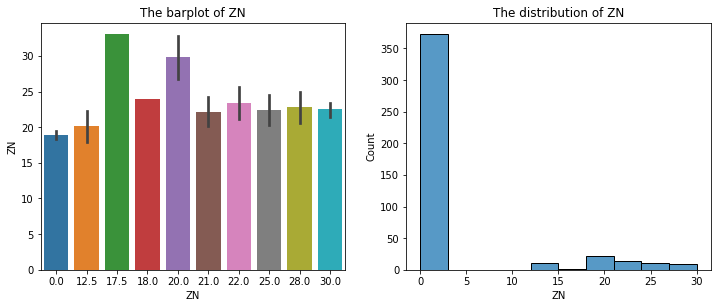

In [77]:
# Relationship between ZN and MEDV
dataset[['ZN','MEDV']].corr()

fig, axes = plt.subplots(1,2,figsize = (12,10))
axes1 = plt.subplot(2,2,1)
sns.barplot(x=dataset['ZN'] ,y=dataset['MEDV'])
axes1.set(ylabel='ZN',title = 'The barplot of ZN')

axes2 = plt.subplot(2,2,2)
sns.histplot(x=dataset['ZN'],ax = axes2)
axes2.set(xlabel='ZN',title = 'The distribution of ZN')

# For ZN, we observe that high class passengers have more probability to survive.
# The correlation is 0.360445 which means there is a positive relationship between ZN and MEDV, but it is not so significant.

,INDUS,MEDV
INDUS,1.00000,-0.61222
MEDV,-0.61222,1.00000


<AxesSubplot:xlabel='INDUS', ylabel='MEDV'>

[Text(0, 0.5, 'INDUS'), Text(0.5, 1.0, 'The barplot of INDUS')]

<AxesSubplot:xlabel='INDUS', ylabel='Count'>

[Text(0.5, 0, 'INDUS'), Text(0.5, 1.0, 'The distribution of INDUS')]

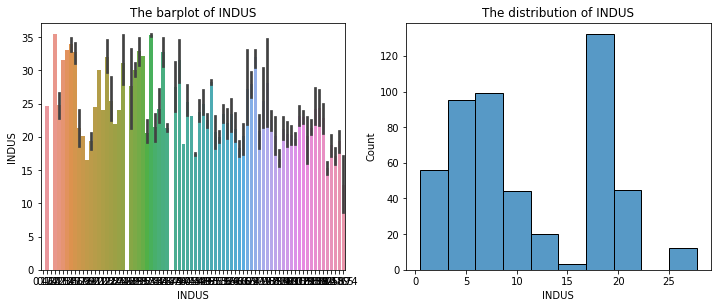

In [78]:
# Relationship between INDUS and MEDV
dataset[['INDUS','MEDV']].corr()

fig, axes = plt.subplots(1,2,figsize = (12,10))
axes1 = plt.subplot(2,2,1)
sns.barplot(x=dataset['INDUS'] ,y=dataset['MEDV'])
axes1.set(ylabel='INDUS',title = 'The barplot of INDUS')

axes2 = plt.subplot(2,2,2)
sns.histplot(x=dataset['INDUS'],ax = axes2)
axes2.set(xlabel='INDUS',title = 'The distribution of INDUS')

# For INDUS, we observe that high class passengers have more probability to survive.
# The correlation is -0.421494 which means there is a negative relationship between INDUS and MEDV, but it is not so significant.


,CHAS,MEDV
CHAS,NaN,NaN
MEDV,NaN,1.0


<AxesSubplot:xlabel='CHAS', ylabel='MEDV'>

[Text(0, 0.5, 'CHAS'), Text(0.5, 1.0, 'The barplot of CHAS')]

<AxesSubplot:xlabel='CHAS', ylabel='Count'>

[Text(0.5, 0, 'CHAS'), Text(0.5, 1.0, 'The distribution of CHAS')]

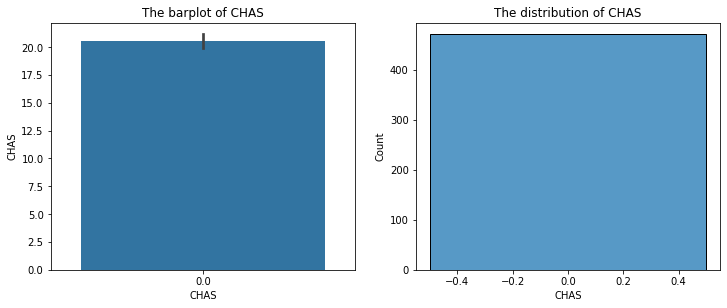

In [79]:
# Relationship between CHAS and MEDV
dataset[['CHAS','MEDV']].corr()

fig, axes = plt.subplots(1,2,figsize = (12,10))
axes1 = plt.subplot(2,2,1)
sns.barplot(x=dataset['CHAS'] ,y=dataset['MEDV'])
axes1.set(ylabel='CHAS',title = 'The barplot of CHAS')

axes2 = plt.subplot(2,2,2)
sns.histplot(x=dataset['CHAS'],ax = axes2)
axes2.set(xlabel='CHAS',title = 'The distribution of CHAS')

In [80]:
NOX

NameError: name 'NOX' is not defined

In [ ]:
RM

In [ ]:
AGE

In [ ]:
DIS

In [ ]:
RAD

In [ ]:
TAX

In [ ]:
PTRATIO

In [ ]:
B

In [ ]:
LSTAT

<AxesSubplot:ylabel='Density'>

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

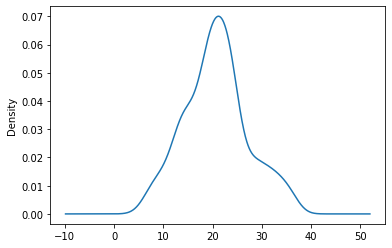

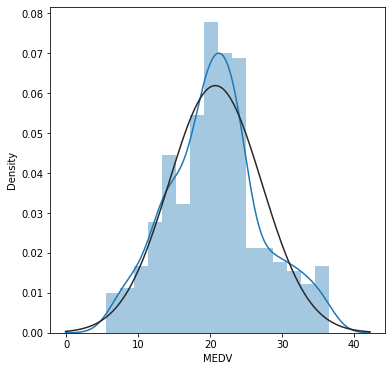

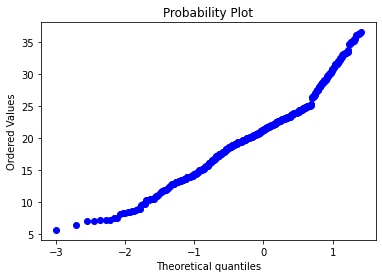

Skewness: 0.20256283436312955
Kurtosis: -0.11829814359992064


In [81]:
## Distribution of the data
dataset['MEDV'].plot(kind = 'density')

## Distribution of Sale Price without any actions
# Histogram
fig, axes = plt.subplots(1,1,figsize = (6,6))
sns.distplot(dataset['MEDV'] , fit=norm)
# QQ-plot
fig = plt.figure() # create a figure
res = stats.probplot(dataset['MEDV'], plot=plt)
plt.show()
## Skewness and kurtosis
print("Skewness: " + str(dataset['MEDV'].skew()))
print("Kurtosis: " + str(dataset['MEDV'].kurt()))

# Through the plot we found that the dataset is veery close to normal distribution.

In [82]:
X = datasetdrop.drop(['MEDV'], axis=1)
y = datasetdrop['MEDV']
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.33,random_state=42)
train_x.shape, test_x.shape, train_y.shape, test_y.shape 

((179, 13), (89, 13), (179,), (89,))

In [85]:
## Linear Regression

cv = KFold(n_splits=10, random_state=42,shuffle=True)
lm = LinearRegression()
lm_cv = cross_val_score(lm, train_x, train_y, scoring="neg_mean_squared_error", cv = cv)
model_lm = lm.fit(train_x,train_y)
predicts_lm = model_lm.predict(test_x)

MSE_lm = np.mean(np.abs(lm_cv))
RMSE_lm = np.sqrt(np.mean(np.abs(lm_cv)))
r2_lm_train = r2.score(test_y,predicts_lm)

MSE_lm_test = mean_squared_error(test_y,predicts_lm)
RMSE_lm_test = np.sqrt(mean_squared_error(test_y,predicts_lm))

print("For Linear Regression Model,")
print("MSE:",MSE_lm)
print("RMSE:",RMSE_lm)
print("r2 score:",r2_lm_train)
print("\n")
print("For Linear Regression Model using testing data,")
print("MSE:",MSE_lm_test)
print("RMSE:",RMSE_lm_test)


For Linear Regression Model,
MSE: 6.684342934691114
RMSE: 2.585409626092375


For Linear Regression Model using testing data,
MSE: 8.290366249850202
RMSE: 2.879299610990527


In [52]:
# To get an overview of appropriate parameter alpha

boston = load_boston()
scaler = StandardScaler()
X = scaler.fit_transform(boston["data"])
Y = boston["target"]
names = boston["feature_names"]
# Create a function called lasso,
def lasso(alphas):
    # Create an empty data frame
    df = pd.DataFrame()
    # Create a column of feature names
    df['Feature Name'] = names
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha)
        # Fit the lasso regression
        lasso.fit(X, Y) 
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha
        # Create a column of coefficient values
        df[column_name] = lasso.coef_  
    # Return the datafram    
    return df
coefficients = lasso([0.001,0.01,0.1,0.5,1])
coefficients.head(8)

,Feature Name,Alpha = 0.001000,Alpha = 0.010000,Alpha = 0.100000,Alpha = 0.500000,Alpha = 1.000000
0,CRIM,-0.925348,-0.900245,-0.632304,-0.115265,-0.000000
1,ZN,1.076739,1.035916,0.708409,0.000000,0.000000
2,INDUS,0.131471,0.046924,-0.000000,-0.000000,-0.000000
3,CHAS,0.682060,0.684152,0.657607,0.397079,0.000000
4,NOX,-2.048349,-1.980551,-1.574193,-0.000000,-0.000000
5,RM,2.675950,2.687312,2.826269,2.974259,2.713355
6,AGE,0.015049,0.000000,-0.000000,-0.000000,-0.000000
7,DIS,-3.100300,-3.058301,-2.422079,-0.170569,-0.000000


In [95]:
## Ridge model

cv = KFold(n_splits=10, random_state=42,shuffle=True)
ridge = RidgeCV(alphas=[0.001,0.01,0.1,0.5,1])
ridge_cv = cross_val_score(ridge, train_x, train_y, scoring="neg_mean_squared_error", cv = cv)
model_ridge=ridge.fit(train_x,train_y)

predicts_ridge = ridge.predict(test_x)

MSE_ridge = np.mean(np.abs(ridge_cv))
RMSE_ridge = np.sqrt(np.mean(np.abs(ridge_cv)))

MSE_ridge_test = mean_squared_error(test_y,predicts_ridge)
RMSE_ridge_test = np.sqrt(mean_squared_error(test_y,predicts_ridge))


print("For Ridge Regression Model,")
print("MSE:",MSE_ridge)
print("RMSE:",RMSE_ridge)
print("\n")
print("For Ridge Regression Model using testing data,")
print("MSE:",MSE_ridge_test)
print("RMSE:",RMSE_ridge_test)


For Ridge Regression Model,
MSE: 6.634211654502709
RMSE: 2.5756963436132585


For Ridge Regression Model using testing data,
MSE: 8.251179736647174
RMSE: 2.8724866817179806


In [96]:
## Lasso model

cv = KFold(n_splits=10, random_state=42,shuffle=True)
lasso = LassoCV(alphas=[0.001,0.01,0.1,0.5,1])
lasso_cv = cross_val_score(lasso, train_x, train_y, scoring="neg_mean_squared_error", cv = cv)
model_lasso=lasso.fit(train_x,train_y)

predicts_lasso = lasso.predict(test_x)

MSE_lasso = np.mean(np.abs(lasso_cv))
RMSE_lasso = np.sqrt(np.mean(np.abs(lasso_cv)))

MSE_lasso_test = mean_squared_error(test_y,predicts_lasso)
RMSE_lasso_test = np.sqrt(mean_squared_error(test_y,predicts_lasso))


print("For Lasso Regression Model,")
print("MSE:",MSE_lasso)
print("RMSE:",RMSE_lasso)
print("\n")
print("For Lasso Regression Model using testing data,")
print("MSLE:",MSE_lasso_test)
print("RMSLE:",RMSE_lasso_test)


For Lasso Regression Model,
MSE: 6.668093580969865
RMSE: 2.582265203454104


For Lasso Regression Model using testing data,
MSLE: 8.258781314081814
RMSLE: 2.873809547287679


In [97]:
## Random Forest

cv = KFold(n_splits=10, random_state=42,shuffle=True)
rf = RandomForestRegressor()
model_rf = rf.fit(train_x,train_y)
rf_cv = cross_val_score(rf, train_x, train_y, scoring="neg_mean_squared_error", cv = cv)

predicts_rf = rf.predict(test_x)

MSE_rf = np.mean(np.abs(rf_cv))
RMSE_rf = np.sqrt(np.mean(np.abs(rf_cv)))

MSLE_rf = mean_squared_error(test_y,predicts_rf)
RMSLE_rf= np.sqrt(mean_squared_error(test_y,predicts_rf))


print("For Random Forest Regression Model,")
print("MSE:",MSE_rf)
print("RMSE:",RMSE_rf)
print("\n")
print("For Random Foerst Model using training data,")
print("MSLE:",MSLE_rf)
print("RMSLE:",RMSLE_rf)



For Random Forest Regression Model,
MSE: 6.67596980653595
RMSE: 2.5837898146977727


For Random Foerst Model using training data,
MSLE: 8.635199887640448
RMSLE: 2.9385710622070125


In [101]:
## Gradient Boosting Regression

cv = KFold(n_splits=10, random_state=1,shuffle=True)
gbr = GradientBoostingRegressor()
model_gbr = gbr.fit(train_x,train_y)
gbr_cv = cross_val_score(gbr, train_x, train_y, scoring="neg_mean_squared_error", cv = cv)

predicts_gbr = gbr.predict(test_x)

MSE_gbr = np.mean(np.abs(gbr_cv))
RMSE_gbr = np.sqrt(np.mean(np.abs(gbr_cv)))

MSLE_gbr = mean_squared_error(test_y,predicts_gbr)
RMSLE_gbr= np.sqrt(mean_squared_error(test_y,predicts_gbr))


print("For Gradient Boosting Regression Model,")
print("MSE:",MSE_gbr)
print("RMSE:",RMSE_gbr)
print("\n")
print("For Gradient Boosting Regression Model using training data,")
print("MSE:",MSE_gbr)
print("RMSE:",RMSE_gbr)



For Gradient Boosting Regression Model,
MSE: 5.370718280443288
RMSE: 2.3174810205141463


For Gradient Boosting Regression Model using training data,
MSE: 5.370718280443288
RMSE: 2.3174810205141463


In [88]:
## Without remove outliers
# Load the data
dataset = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
dataset.info()
# This datazset has 506 observations and 13 attribute variables, most of them are float type.
# From the nummber of each variables, we observe that there is no missing values.
dataset['MEDV'] = boston_dataset.target   # Add response variables
dataset.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


In [89]:
X_n = dataset.drop(['MEDV'], axis=1)
y_n = dataset['MEDV']
train_x_n, test_x_n, train_y_n, test_y_n = train_test_split(X_n,y_n,test_size=0.33,random_state=42)
train_x_n.shape, test_x_n.shape, train_y_n.shape, test_y_n.shape 

((339, 13), (167, 13), (339,), (167,))

In [102]:
## Linear Regression

cv = KFold(n_splits=10, random_state=42,shuffle=True)
lm = LinearRegression()
lm_cv_n = cross_val_score(lm, train_x_n, train_y_n, scoring="neg_mean_squared_error", cv = cv)
model_lm = lm.fit(train_x_n,train_y_n)
predicts_lm_n = model_lm.predict(test_x_n)

MSE_lm_n = np.mean(np.abs(lm_cv_n))
RMSE_lm_n = np.sqrt(np.mean(np.abs(lm_cv_n)))

MSE_lm_test_n = mean_squared_error(test_y_n,predicts_lm)
RMSE_lm_test_n = np.sqrt(mean_squared_error(test_y_n,predicts_lm))

print("For Linear Regression Model,")
print("MSE:",MSE_lm_n)
print("RMSE:",RMSE_lm_n)
print("\n")
print("For Linear Regression Model using testing data,")
print("MSE:",MSE_lm_test_n)
print("RMSE:",RMSE_lm_test_n)


For Linear Regression Model,
MSE: 26.859003040500568
RMSE: 5.182567224889666


For Linear Regression Model using testing data,
MSE: 20.72402343733962
RMSE: 4.552364598463047
